In [6]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stop = stopwords.words('english')

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =  pd.read_csv("reviews.csv")

#shape of the dataframe
print('The shape of the dataframe is :',df.shape)

#first few records
df.head()

The shape of the dataframe is : (16054, 12)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...,Mad Scientist,https://lh3.googleusercontent.com/-kIZF4kMt6yY...,"Unable to register with an email. Clicking""con...",1,76,5.2.0.9,2020-07-10 23:29:22,We are unaware of any issues with signing in t...,2020-07-12 13:32:19,most_relevant,com.anydo
1,gp:AOqpTOGG5EdQ69VnyUoJ2bJ4jB_hWqNeLh9nZ-ULOVz...,Sergey P,https://lh3.googleusercontent.com/a-/AOh14GgVZ...,Any.Forget... Had an instance of daily repeati...,1,12,5.2.0.9,2020-07-08 15:07:48,Our team will be happy to look into this issue...,2020-07-09 13:49:41,most_relevant,com.anydo
2,gp:AOqpTOFP7H5aFBDA-Bd_w7e2A-19zZffNJbbH1OL-CY...,Jay Nishimura,https://lh3.googleusercontent.com/a-/AOh14GhJ7...,"It works okay, But I did not consent to subscr...",1,27,5.2.0.9,2020-07-06 15:21:44,A payment can only be made upon the user's aut...,2020-07-07 16:31:27,most_relevant,com.anydo
3,gp:AOqpTOEF7Dt1m_v8AlD_EcsuXBiLKDZJxNANOVM8ohA...,Tom Larkin,https://lh3.googleusercontent.com/-rQ0FefEbngc...,Ruined the app by trying to get too fancy. My ...,1,7,5.2.0.9,2020-07-03 22:50:36,Please note that we've recently released a new...,2020-07-07 15:59:07,most_relevant,com.anydo
4,gp:AOqpTOF3Kb-6IdEeeYLcuUncmzjQdtNguLU5GTshqNY...,A Traveller,https://lh3.googleusercontent.com/-yutN8c-KH6U...,This app is a prime example of building a moun...,1,23,5.0.0.11,2020-05-09 22:50:56,If you're having trouble figuring out how to t...,2020-05-12 13:52:05,most_relevant,com.anydo


In [7]:
df['content'].isnull().sum()

0

In [10]:
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [11]:
all_spam = df['content'].str.split(' ')


In [12]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)
final_text_spam[:500]

'Unable register email Clicking"continue email take login page Complete waste time I searched first three pages Google solution found nothing Found solution help section I want register Facebook Google If include feature make sure actually works Any.Forget Had instance daily repeating event I marked complete today somehow skip next day proceeded day after Kind daily event days skipped So useless can\'t trusted notifying daily routine tasks P.S tell I know setup recurring event It works okay But I '

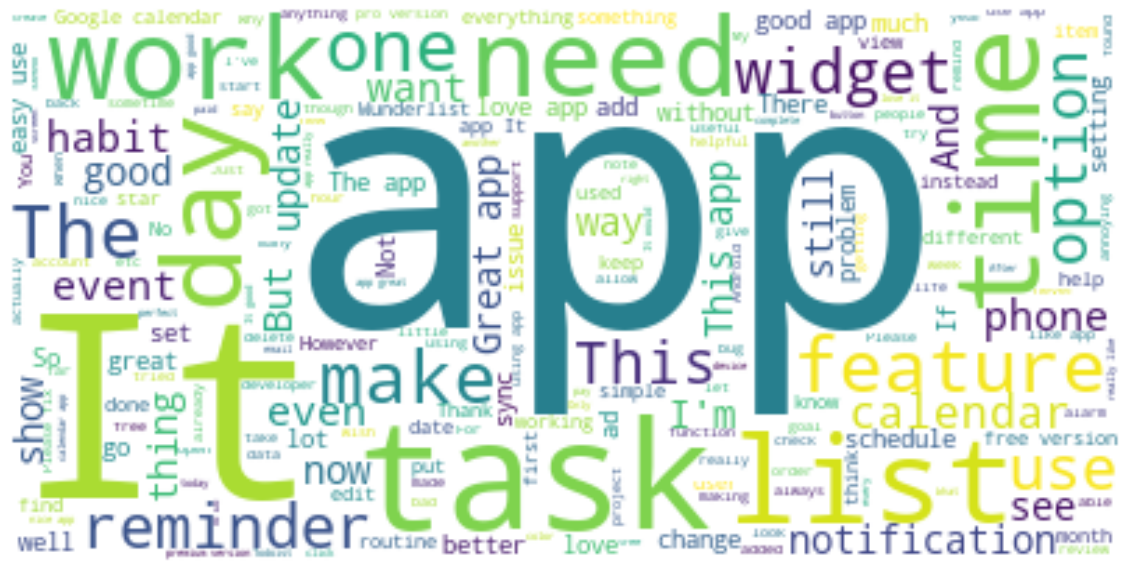

In [13]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

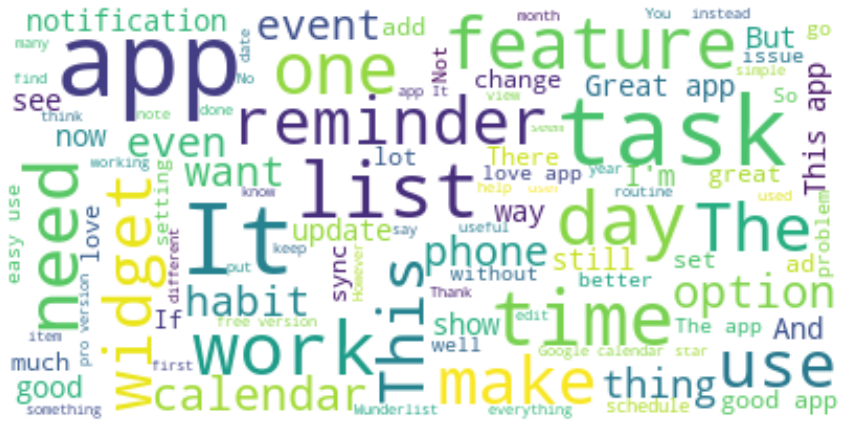

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(["subject","re","vince","kaminski","enron","cc", "will", "s", "1","e","t"])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
filtered_words_spam = [word for word in final_text_spam.split() if word not in stopwords]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: I, count: 16727
Word: app, count: 11044
Word: tasks, count: 2603
Word: use, count: 2492
Word: time, count: 2410
Word: The, count: 2094
Word: It, count: 2010
Word: good, count: 1798
Word: task, count: 1734
Word: one, count: 1686
Word: calendar, count: 1680
Word: day, count: 1664
Word: list, count: 1611
Word: really, count: 1591
Word: This, count: 1547
Word: work, count: 1508
Word: version, count: 1491
Word: great, count: 1468
Word: I'm, count: 1288
Word: love, count: 1250
Word: add, count: 1216
Word: using, count: 1118
Word: even, count: 1082
Word: want, count: 1075
Word: widget, count: 1072
Word: It's, count: 1056
Word: make, count: 1045
Word: phone, count: 1037
Word: need, count: 1028
Word: set, count: 1025


In [34]:
#################################################################################################

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [17]:
dat =  pd.read_csv("reviews.csv")
print(dat.shape)
dat.head(5)

(16054, 12)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...,Mad Scientist,https://lh3.googleusercontent.com/-kIZF4kMt6yY...,"Unable to register with an email. Clicking""con...",1,76,5.2.0.9,2020-07-10 23:29:22,We are unaware of any issues with signing in t...,2020-07-12 13:32:19,most_relevant,com.anydo
1,gp:AOqpTOGG5EdQ69VnyUoJ2bJ4jB_hWqNeLh9nZ-ULOVz...,Sergey P,https://lh3.googleusercontent.com/a-/AOh14GgVZ...,Any.Forget... Had an instance of daily repeati...,1,12,5.2.0.9,2020-07-08 15:07:48,Our team will be happy to look into this issue...,2020-07-09 13:49:41,most_relevant,com.anydo
2,gp:AOqpTOFP7H5aFBDA-Bd_w7e2A-19zZffNJbbH1OL-CY...,Jay Nishimura,https://lh3.googleusercontent.com/a-/AOh14GhJ7...,"It works okay, But I did not consent to subscr...",1,27,5.2.0.9,2020-07-06 15:21:44,A payment can only be made upon the user's aut...,2020-07-07 16:31:27,most_relevant,com.anydo
3,gp:AOqpTOEF7Dt1m_v8AlD_EcsuXBiLKDZJxNANOVM8ohA...,Tom Larkin,https://lh3.googleusercontent.com/-rQ0FefEbngc...,Ruined the app by trying to get too fancy. My ...,1,7,5.2.0.9,2020-07-03 22:50:36,Please note that we've recently released a new...,2020-07-07 15:59:07,most_relevant,com.anydo
4,gp:AOqpTOF3Kb-6IdEeeYLcuUncmzjQdtNguLU5GTshqNY...,A Traveller,https://lh3.googleusercontent.com/-yutN8c-KH6U...,This app is a prime example of building a moun...,1,23,5.0.0.11,2020-05-09 22:50:56,If you're having trouble figuring out how to t...,2020-05-12 13:52:05,most_relevant,com.anydo


In [18]:
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [19]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

df['Sentiment'] = df.score.apply(to_sentiment)

In [20]:
df.groupby('Sentiment')['content'].count()


Sentiment
0    5164
1    5140
2    5750
Name: content, dtype: int64

In [21]:
df['character_cnt'] = df['content'].str.len()
df.groupby('Sentiment')['character_cnt'].mean()


Sentiment
0    140.706042
1    129.657004
2    126.637043
Name: character_cnt, dtype: float64

In [22]:
df['word_counts'] = df['content'].str.split().str.len()
df.groupby('Sentiment')['word_counts'].mean()

Sentiment
0    22.199264
1    20.527237
2    20.184870
Name: word_counts, dtype: float64

In [23]:
df['characters_per_word'] = df['character_cnt']/df['word_counts']
df.groupby('Sentiment')['characters_per_word'].mean()

Sentiment
0    6.324472
1    6.200064
2    6.144796
Name: characters_per_word, dtype: float64

In [24]:
df['spl'] = df['content'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['content','spl']].head()

,content,spl
0,"Unable register email. Clicking""continue email...",0
1,Any.Forget... Had instance daily repeating eve...,0
2,"It works okay, But I consent subscribing $28/y...",0
3,Ruined app trying get fancy. My wife also beco...,0
4,This app prime example building mountain mold ...,0


In [25]:
df['num'] = df['content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df.groupby('Sentiment')['num'].mean()

Sentiment
0    0.182223
1    0.177626
2    0.135478
Name: num, dtype: float64

In [26]:
dat = df.copy(deep = True)

In [27]:
dat['processedtext'] = dat['content'].str.replace('[^\w\s]','') 
dat['processedtext'] = dat['processedtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dat['processedtext'] = dat['processedtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Lines 4 to 6
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
dat['processedtext'] = dat['processedtext'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

dat[['character_cnt','word_counts','characters_per_word', 'spl', 'num', 'processedtext']].head()

,character_cnt,word_counts,characters_per_word,spl,num,processedtext
0,253,36,7.027778,0,0,unabl regist email clickingcontinu email take ...
1,246,37,6.648649,0,0,anyforget had instanc daili repeat event i mar...
2,258,42,6.142857,0,0,it work okay but i consent subscrib 28year sub...
3,178,30,5.933333,0,0,ruin app tri get fanci my wife also becom frus...
4,296,44,6.727273,0,0,thi app prime exampl build mountain mold hill ...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))

dat_tfIdf = tfidf.fit_transform(dat['processedtext'])
dat_tfIdf

<16054x500 sparse matrix of type '<class 'numpy.float64'>'
	with 169844 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bag_words = CountVectorizer(max_features=500, lowercase=True, ngram_range=(1,1),analyzer = "word")
dat_BOW = bag_words.fit_transform(dat['processedtext'])
dat_BOW

<16054x500 sparse matrix of type '<class 'numpy.int64'>'
	with 203251 stored elements in Compressed Sparse Row format>

In [30]:
# https://www.datacamp.com/community/tutorials/wordcloud-python

In [31]:
text = " ".join(review for review in df['content'])

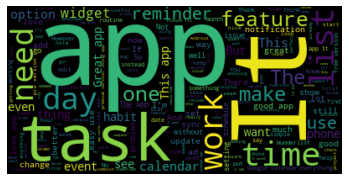

In [32]:

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

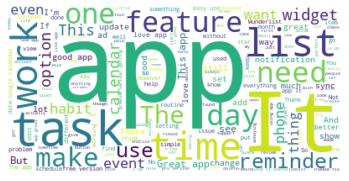

In [33]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()